In [1]:
from DSGRN import *
import csv

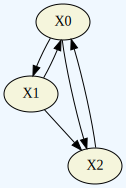

In [2]:
net_spec = 'X0 : X1+X2\n X1 : X0 : E\n X2 : X0+X1 : E'

network = DSGRN.Network(net_spec)
parameter_graph = DSGRN.ParameterGraph(network)

DSGRN.DrawGraph(network)

Read hysteresis paths data from file.

In [3]:
hyst_paths_fname = 'hysteresis_paths_3_nodes.csv'

hysteretic_paths = []
with open(hyst_paths_fname, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        # Transfor str to integers
        path = [int(p) for p in row]
        hysteretic_paths.append(path)

In [10]:
print('Number of hysteresis paths:', len(hysteretic_paths))

Number of hysteresis paths: 133


List of hysteresis paths

In [5]:
hysteretic_paths

[[62, 67, 70, 75, 76, 78, 79],
 [62, 67, 70, 75, 76, 78],
 [62, 67, 70, 75, 76],
 [62, 67, 70, 75, 77, 78, 79],
 [62, 67, 70, 75, 77, 78],
 [62, 67, 70, 72, 77, 78, 79],
 [62, 67, 70, 72, 77, 78],
 [62, 67, 68, 72, 77, 78, 79],
 [62, 67, 68, 72, 77, 78],
 [62, 64, 70, 75, 76, 78, 79],
 [62, 64, 70, 75, 76, 78],
 [62, 64, 70, 75, 76],
 [62, 64, 70, 75, 77, 78, 79],
 [62, 64, 70, 75, 77, 78],
 [62, 64, 70, 72, 77, 78, 79],
 [62, 64, 70, 72, 77, 78],
 [62, 64, 65],
 [61, 63, 64, 70, 75, 76, 78, 79],
 [61, 63, 64, 70, 75, 76, 78],
 [61, 63, 64, 70, 75, 76],
 [61, 63, 64, 70, 75, 77, 78, 79],
 [61, 63, 64, 70, 75, 77, 78],
 [61, 63, 64, 70, 72, 77, 78, 79],
 [61, 63, 64, 70, 72, 77, 78],
 [61, 63, 64, 65],
 [61, 63, 69, 74, 75, 76, 78, 79],
 [61, 63, 69, 74, 75, 76, 78],
 [61, 63, 69, 74, 75, 76],
 [61, 63, 69, 74, 75, 77, 78, 79],
 [61, 63, 69, 74, 75, 77, 78],
 [61, 63, 69, 70, 75, 76, 78, 79],
 [61, 63, 69, 70, 75, 76, 78],
 [61, 63, 69, 70, 75, 76],
 [61, 63, 69, 70, 75, 77, 78, 79],
 [

Let's look at a particular hysteretic path.

In [6]:
# Pick a particular hysteretic path
hyst_path = hysteretic_paths[17]
# hyst_path = hysteretic_paths[3]

Print parameter information along the path

In [7]:
for par_index in hyst_path:
    parameter = parameter_graph.parameter(par_index)
    print('index:', par_index, ', parameter:', parameter)

index: 61 , parameter: [["X0",[2,2,"40"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 63 , parameter: [["X0",[2,2,"50"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 64 , parameter: [["X0",[2,2,"54"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 70 , parameter: [["X0",[2,2,"D4"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 75 , parameter: [["X0",[2,2,"F4"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 76 , parameter: [["X0",[2,2,"F5"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 78 , parameter: [["X0",[2,2,"FD"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]
index: 79 , parameter: [["X0",[2,2,"FF"],[1,0]],["X1",[1,2,"C"],[0,1]],["X2",[2,1,"E"],[0]]]


Print Morse graphs along the path

In [8]:
for par_index in hyst_path:
    parameter = parameter_graph.parameter(par_index)
    domain_graph = DSGRN.DomainGraph(parameter)
    morse_decomp = DSGRN.MorseDecomposition(domain_graph.digraph())
    morse_graph = DSGRN.MorseGraph(domain_graph, morse_decomp)
    morse_graph_poset = morse_graph.poset()
    annotations = [morse_graph.annotation(n)[0] for n in range(morse_graph.poset().size())]
    print('index:', par_index, ', Morse sets:', annotations)

index: 61 , Morse sets: ['FP { 0, 0, 0 }']
index: 63 , Morse sets: ['FP { 0, 0, 0 }', 'FP { 1, 0, 1 }']
index: 64 , Morse sets: ['FP { 0, 0, 0 }', 'FP { 1, 0, 1 }']
index: 70 , Morse sets: ['FP { 0, 0, 0 }', 'FP { 1, 0, 1 }', 'FP { 2, 2, 1 }']
index: 75 , Morse sets: ['FP { 0, 0, 0 }', 'FP { 2, 2, 1 }']
index: 76 , Morse sets: ['FP { 2, 2, 1 }']
index: 78 , Morse sets: ['FP { 2, 2, 1 }']
index: 79 , Morse sets: ['FP { 2, 2, 1 }']


Draw table of Morse sets along the path

In [9]:
Table(["Parameter Index", "Morse Graph"], 
      [[p, DrawGraph(MorseGraph(DomainGraph(parameter_graph.parameter(p))))] for p in hyst_path])

Parameter Index,Morse Graph
61,"digraph { 0[label=""FP { 0, 0, 0 }""]; }"
63,"digraph { 0[label=""FP { 0, 0, 0 }""]; 1[label=""FP { 1, 0, 1 }""]; }"
64,"digraph { 0[label=""FP { 0, 0, 0 }""]; 1[label=""FP { 1, 0, 1 }""]; }"
70,"digraph { 0[label=""FP { 0, 0, 0 }""]; 1[label=""FP { 1, 0, 1 }""]; 2[label=""FP { 2, 2, 1 }""]; }"
75,"digraph { 0[label=""FP { 0, 0, 0 }""]; 1[label=""FP { 2, 2, 1 }""]; }"
76,"digraph { 0[label=""FP { 2, 2, 1 }""]; }"
78,"digraph { 0[label=""FP { 2, 2, 1 }""]; }"
79,"digraph { 0[label=""FP { 2, 2, 1 }""]; }"
